In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

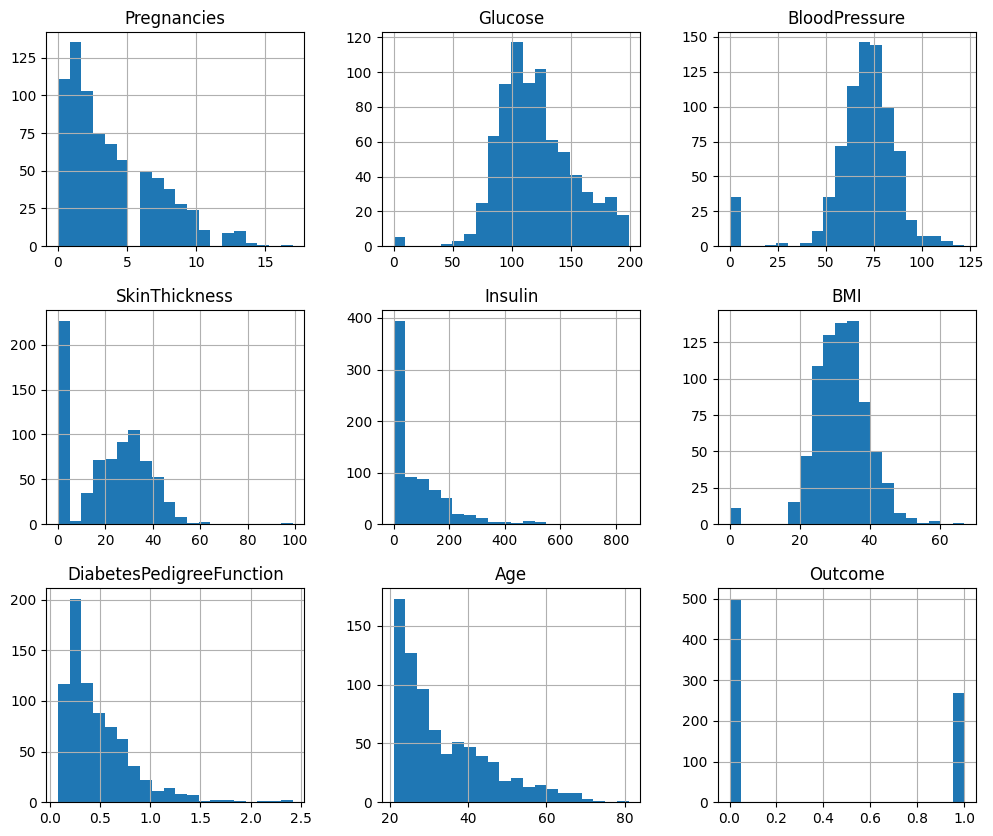

In [9]:
# Histograms for numerical variables
df.hist(bins=20, figsize=(12, 10))
plt.show()

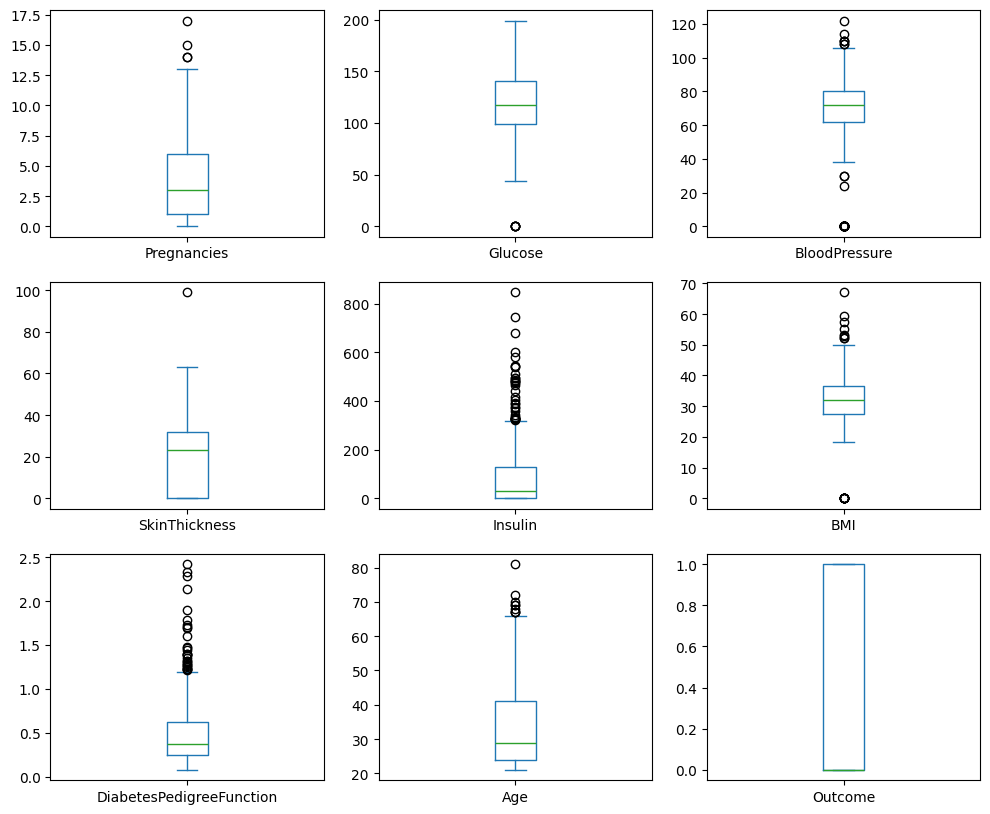

In [10]:
# Boxplots for numerical variables
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.show()

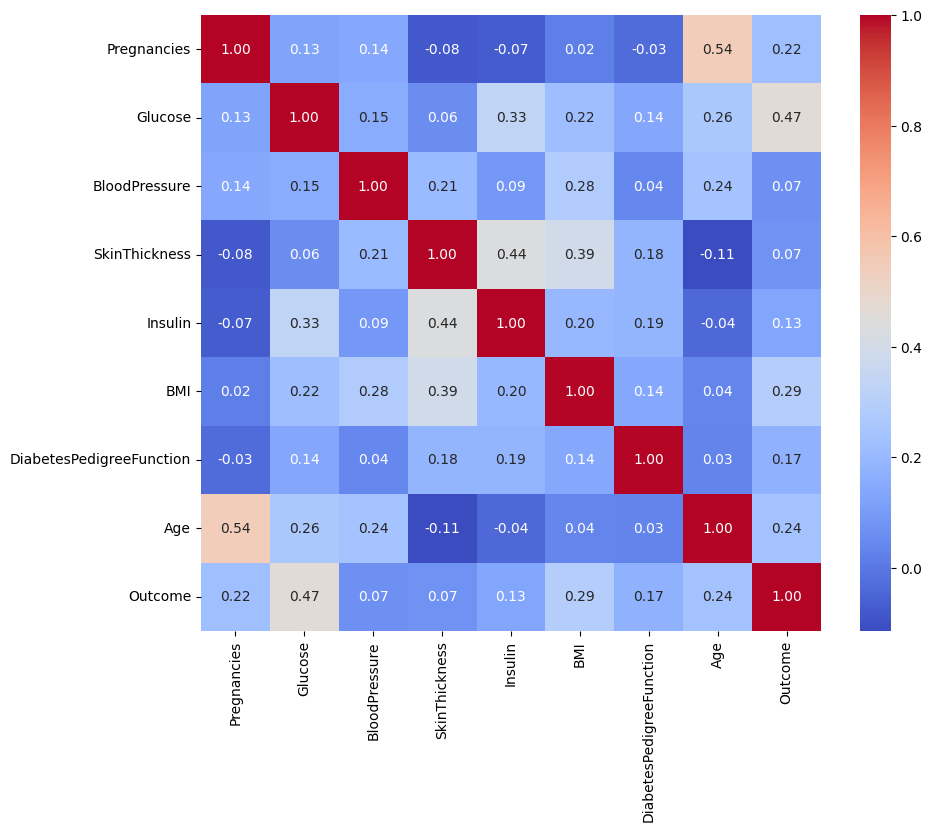

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

##### Removing Missing and null Values

In [12]:
zero_values_count = (df == 0).sum()

zero_values_count

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
# these features contains 0 value : 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'

In [14]:
# so we have to remove it by its mean

In [15]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    median_value = df[column][df[column] != 0].median()
    df[column] = df[column].replace(0, median_value)

In [16]:
(df==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [17]:
# pregnancies can be zero

##### Removing Outliers

In [18]:
# Function to detect outliers using IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Keep rows that are within the bounds of 1.5 * IQR
    df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

# Apply the function to the dataset
df_cleaned = remove_outliers(df)

In [19]:
df_cleaned.shape, df.shape 

((375, 9), (768, 9))

##### Train Test Split

In [21]:
X = df_cleaned.drop('Outcome',axis=1)
y = df_cleaned['Outcome']

In [22]:
X.shape, y.shape

((375, 8), (375,))

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,125,33.6,0.627,50
1,1,85,66,29,125,26.6,0.351,31
2,8,183,64,29,125,23.3,0.672,32
5,5,116,74,29,125,25.6,0.201,30
7,10,115,72,29,125,35.3,0.134,29


In [26]:
y.head()

0    1
1    0
2    1
5    0
7    0
Name: Outcome, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((300, 8), (75, 8))

In [30]:
y_train.shape, y_test.shape

((300,), (75,))

##### Decision Tree Algorithm

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
from sklearn.model_selection import GridSearchCV , cross_val_score

In [35]:
dicisionTree = DecisionTreeClassifier()

In [36]:
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [37]:
clf = GridSearchCV(estimator=dicisionTree, param_grid=parameters, cv=5, scoring='accuracy')

In [38]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [39]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [40]:
y_pred = clf.predict(X_test)

In [41]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

In [43]:
score = accuracy_score(y_pred,y_test)

In [44]:
score

0.6533333333333333

In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        54
           1       0.41      0.57      0.48        21

    accuracy                           0.65        75
   macro avg       0.61      0.63      0.61        75
weighted avg       0.69      0.65      0.67        75



In [47]:
precision = precision_score(y_pred,y_test)

In [48]:
precision

0.41379310344827586

In [49]:
recall = recall_score(y_pred,y_test)

In [50]:
recall

0.5714285714285714

In [51]:
f1 = f1_score(y_pred,y_test)

In [52]:
f1

0.48000000000000004

In [54]:
# Print performance metrics
print(f'Accuracy: {score:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.65
Precision: 0.41
Recall: 0.57
F1 Score: 0.48


##### Confusion Matrix

In [57]:
conf_matrix = confusion_matrix(y_pred,y_test)

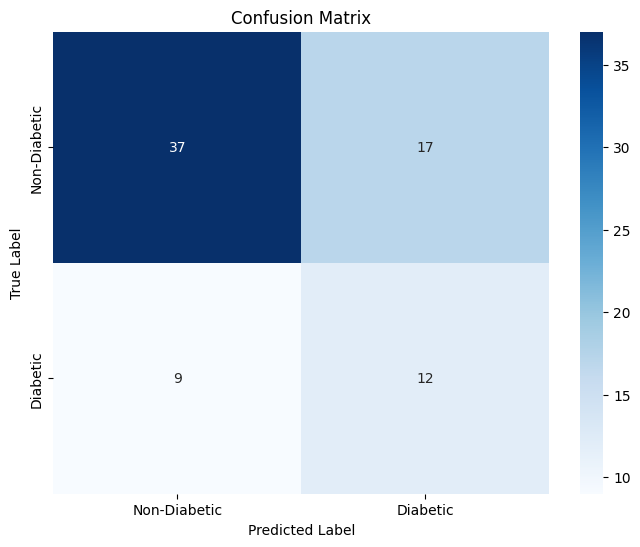

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### ROC curve and AUC

In [62]:
from sklearn.metrics import roc_curve, auc

In [63]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

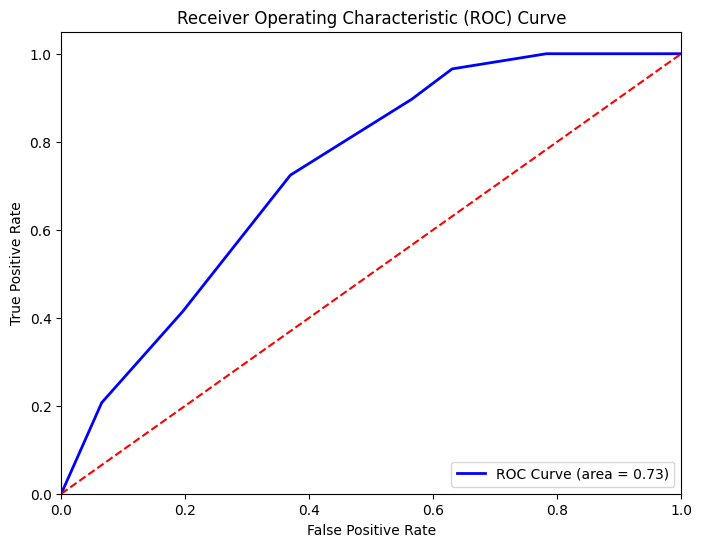

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### Dicision Tree Visualization

In [67]:
from sklearn.tree import plot_tree

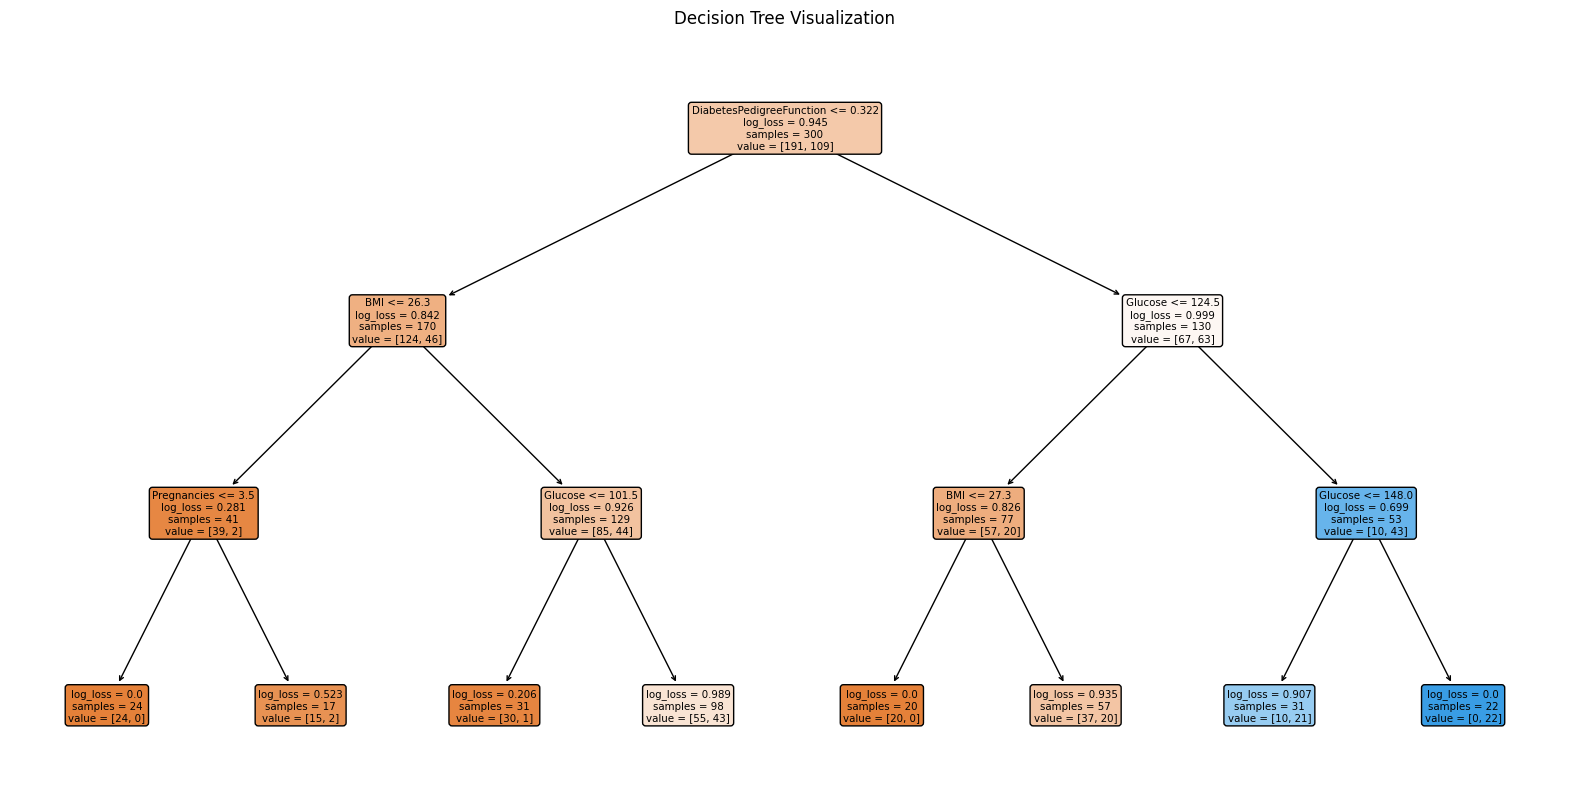

In [68]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf.best_estimator_, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()